# Preprocessing steps analysis for Hoag datasets

### Import modules and define methods

In [1]:
%reload_ext autoreload
%autoreload 2

from preprocess import *
from argparse import Namespace

import matplotlib.pyplot as plt
plt.set_cmap('gray')

metadata={}

def show_img(img, title='', axis=False, vmin=None, vmax=None):
    imshow_args = {}
    
    if vmin:
        imshow_args['vmin'] = vmin
    if vmax:
        imshow_args['vmax'] = vmax
    
    im_axis = 'on' if axis else 'off'
    plt.axis(im_axis)
    plt.imshow(img, **imshow_args)
    plt.title(title, fontsize=15)

def show_gad_comparison(img_pre, img_low, img_post, vmin=None, vmax=None):
    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()

    fig.add_subplot(1, 3, 1)
    show_img(img_pre, title='Pre contrast', vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 3, 2)
    show_img(img_low, title='10% dosage', vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 3, 3)
    show_img(img_post, title='Full dosage', vmin=vmin, vmax=vmax)

    plt.show()

def show_comparison(img1, img2, titles=['', ''], vmin=None, vmax=None):
    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()

    fig.add_subplot(1, 2, 1)
    show_img(img1, title=titles[0], vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 2, 2)
    show_img(img2, title=titles[1], vmin=vmin, vmax=vmax)
    
    plt.show()

def iminfo(img):
    print(img.shape, img.dtype, img.min(), img.max(), img.mean())

def diff_img(img1, img2):
    return np.abs(np.subtract(img1.astype(np.float32), img2.astype(np.float32))).astype(np.float32)

Using TensorFlow backend.


### Initialize dummy argparse Namespace

In [2]:
args = Namespace(
    path_base='/home/srivathsa/projects/studies/gad/hoag/data', verbose=True,
    output='/home/srivathsa/projects/studies/gad/hoag/preprocess/data/101_Id_003.h5',
    discard_start_percent=0, discard_end_percent=0, normalize=True,
    normalize_fun='mean', transform_type='affine', scale_matching=True,
    path_zero=None, path_low=None, path_full=None, mask_threshold=0.04,
    override=False, skip_mask=False, scale_dicom_tags=False, skip_scale_im=False,
    skip_registration=False, nslices=20, joint_normalize=False, global_scale_ref_im0=False
)

### Fetch original images

In [3]:
ims, hdr, metadata = get_images(args, metadata)
orig_ims = np.copy(ims)

path_zero = /home/srivathsa/projects/studies/gad/hoag/data/101_Id_026/Mri_Brain_W_Wo_Contrast_-_0/SAG_MPRAGE_2
path_low = /home/srivathsa/projects/studies/gad/hoag/data/101_Id_026/Mri_Brain_W_Wo_Contrast_-_0/SAG_MPRAGE_WE_10_PERCENT_10
path_full = /home/srivathsa/projects/studies/gad/hoag/data/101_Id_026/Mri_Brain_W_Wo_Contrast_-_0/SAG_MPRAGE_WE_POST_12
image sizes:  (224, 320, 320) (224, 320, 320) (224, 320, 320)


(320, 320) float32 0.0 1590.0 203.27867
(320, 320) float32 0.0 1718.0 163.46953
(320, 320) float32 0.0 1831.0 209.00232


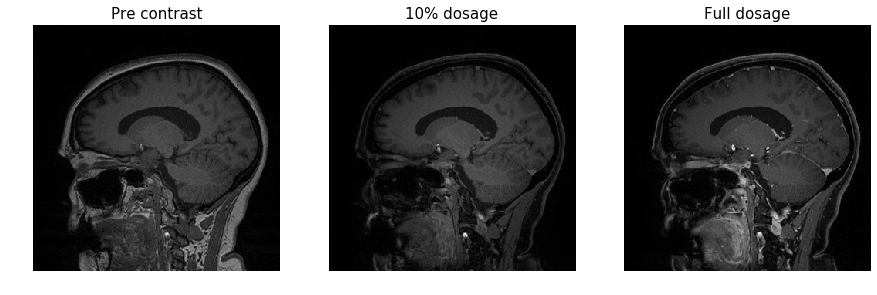

In [4]:
iminfo(ims[96, 0])
iminfo(ims[96, 1])
iminfo(ims[96, 2])

show_gad_comparison(ims[96, 0], ims[96, 1], ims[96, 2])

### Mask images

In [5]:
ims, mask, metadata = mask_images(args, ims, metadata)

masking


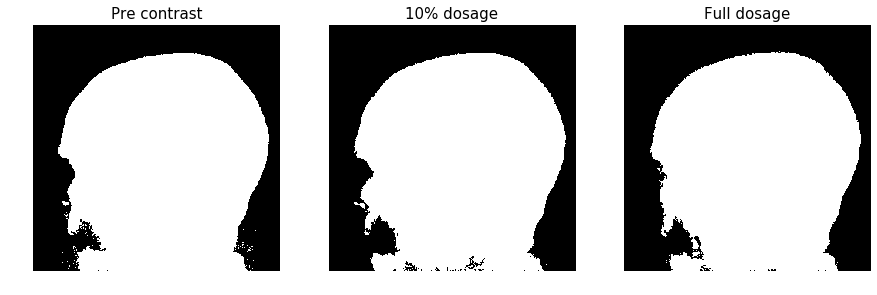

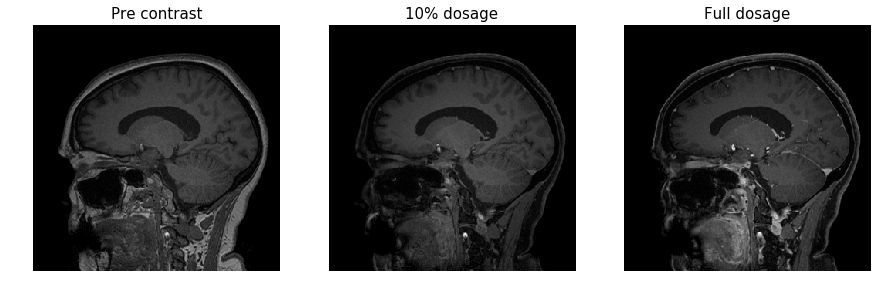

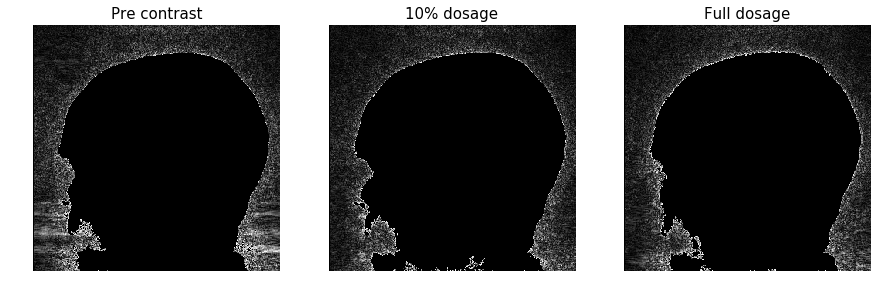

In [6]:
show_gad_comparison(mask[96, 0], mask[96, 1], mask[96, 2])
show_gad_comparison(ims[96, 0], ims[96, 1], ims[96, 2])

pre_diff = diff_img(orig_ims[96, 0], ims[96, 0])
low_diff = diff_img(orig_ims[96, 1], ims[96, 1])
post_diff = diff_img(orig_ims[96, 2], ims[96, 2])

show_gad_comparison(pre_diff, low_diff, post_diff)

### Scale DICOM slope and intercept

In [7]:
ims, metadata = dicom_scaling(args, ims, hdr, metadata)

(320, 320) float32 0.0 1590.0 198.17671
(320, 320) float32 0.0 1718.0 158.98676
(320, 320) float32 0.0 1831.0 204.06445


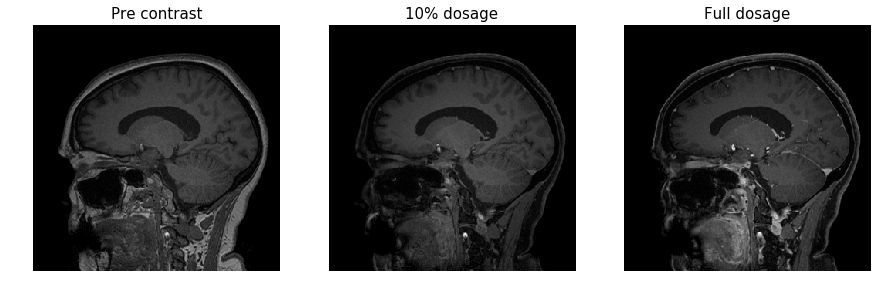

In [8]:
iminfo(ims[96, 0])
iminfo(ims[96, 1])
iminfo(ims[96, 2])

show_gad_comparison(ims[96, 0], ims[96, 1], ims[96, 2])

### Histogram normalization

In [9]:
orig_ims = np.copy(ims)
ims, metadata = hist_norm(args, ims, metadata)

image intensity normalization
scaling done, 2.02 s
image intensity normalization
scaling done, 1.93 s


(320, 320) float32 0.0 1590.0 198.17671
(320, 320) float32 0.0 1589.5087 208.84296
(320, 320) float32 0.0 1633.1094 202.42787


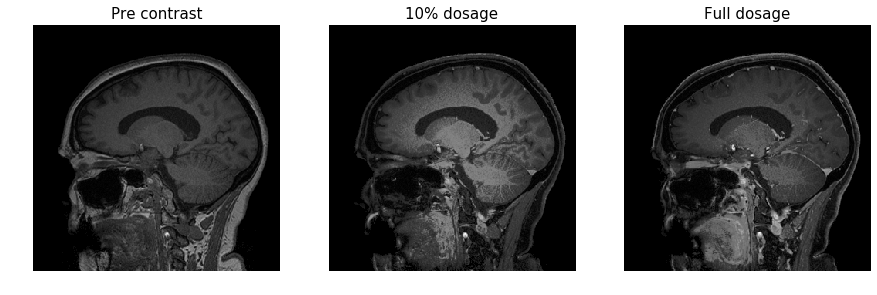

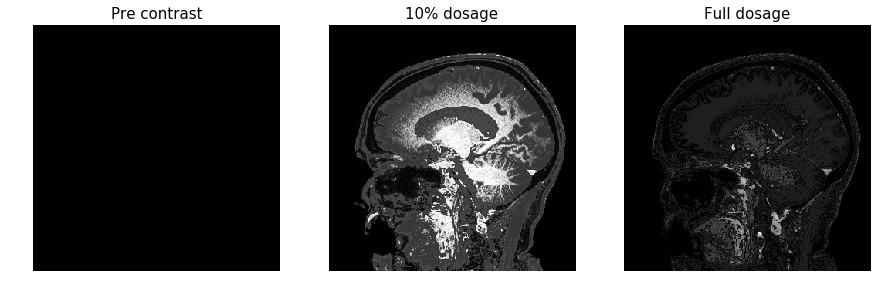

In [10]:
iminfo(ims[96, 0])
iminfo(ims[96, 1])
iminfo(ims[96, 2])

show_gad_comparison(ims[96, 0], ims[96, 1], ims[96, 2])

pre_diff = diff_img(orig_ims[96, 0], ims[96, 0])
low_diff = diff_img(orig_ims[96, 1], ims[96, 1])
post_diff = diff_img(orig_ims[96, 2], ims[96, 2])

show_gad_comparison(pre_diff, low_diff, post_diff)

### Image registration

In [11]:
ims, metadata = register(args, ims, metadata)

image registration
registration done, 43.1 s
low dose transform parameters: ('1.00076', '0.00694834', '-0.0113652', '-0.00792264', '1.00284', '-0.00281191', '0.0168677', '0.00313104', '1.00331', '0.645436', '0.0104409', '-0.492319')
image registration
registration done, 44.6 s
full dose transform parameters: ('1.00015', '0.00927088', '-0.00069922', '-0.0100619', '1.00527', '-0.000704617', '0.00248062', '0.000854085', '1.00406', '0.768555', '-0.131262', '0.293964')


(320, 320) float32 -63.769207 1619.5652 206.8414
(320, 320) float32 -58.7675 1676.8274 201.9577


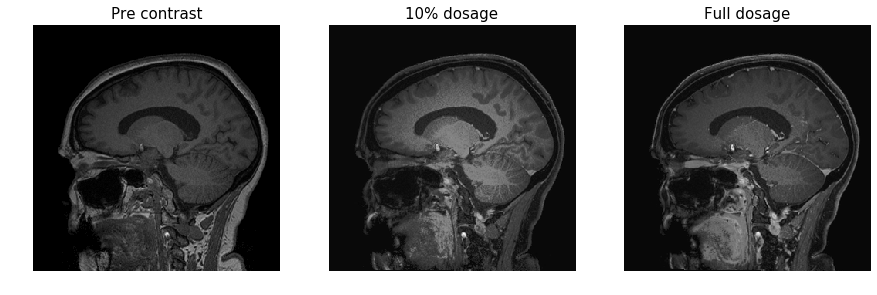

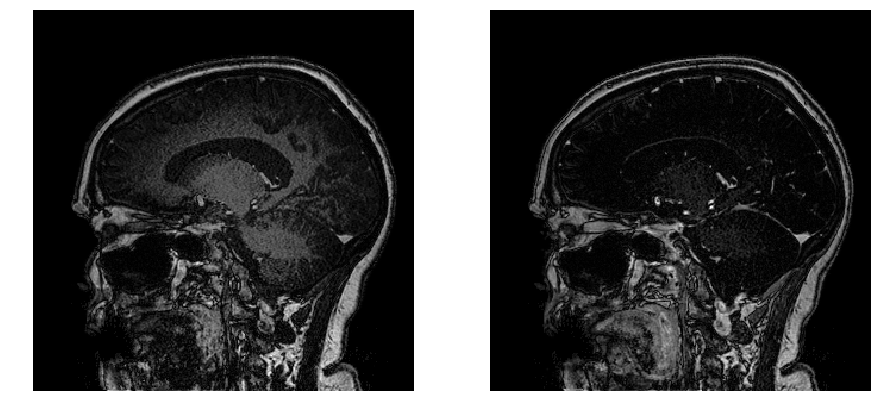

In [12]:
iminfo(ims[96, 1])
iminfo(ims[96, 2])

show_gad_comparison(ims[96, 0], ims[96, 1], ims[96, 2])
show_comparison(diff_img(ims[96, 0], ims[96, 1]), diff_img(ims[96, 0], ims[96, 2]))

### Zoom

In [13]:
args.zoom = 512
args.zoom_order = 3

ims_zoom, metadata = zoom_process(args, ims, metadata)

zooming to 512
zoom 0
zoom 0 done: 35.16565656661987 s
zoom 1
zoom 1 done: 34.44529175758362 s
zoom 2
zoom 2 done: 35.10244131088257 s
(224, 3, 512, 512)


(224, 3, 512, 512) float32 -103.50166 1904.5853 120.45363


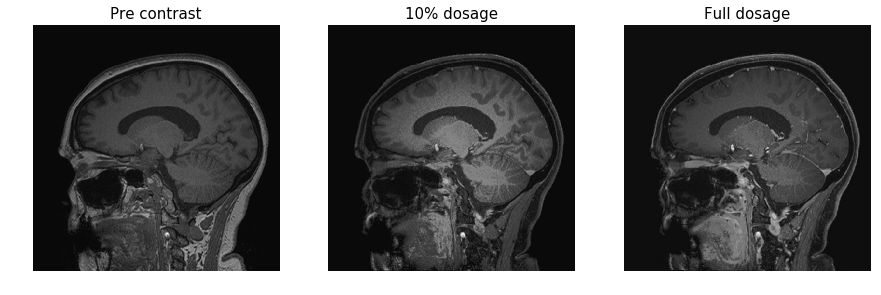

In [14]:
iminfo(ims_zoom)
show_gad_comparison(ims_zoom[96, 0], ims_zoom[96, 1], ims_zoom[96, 2])

### Match scales and global normalization

In [15]:
orig_ims = np.copy(ims)

ims, ims_mod, metadata = prescale_process(args, ims, mask, metadata)
ims, ims_mod, metadata = match_scales(args, ims, ims_mod, metadata)
ims, metadata = global_norm(args, ims, ims_mod, metadata)

intensity before scaling:
mean [282.90292 301.6816  305.77966]
median [275.      293.36087 289.60776]
max [1309.     1404.5317 1869.0978]
scale low: 0.715465988765427
scale full: 0.715465988765427
done scaling data (2.08 s)
intensity after scaling:
mean [282.90292 215.8396  218.77113]
median [275.      209.88972 207.2045 ]
max [1309.      1004.89465 1337.2759 ]
normalizing with function  mean <function mean at 0x7f8740365048>
intensity before global scaling:
mean [282.90292 215.80571 218.71439]
median [275.      209.88972 207.2045 ]
max [1309.      1004.89465 1337.2759 ]
global scaling: [[282.90292 215.80571 218.71439]]
done (0.21s)
intensity after global scaling:
mean [0.9999155 1.0000179 1.0000042]
median [0.9720649 0.9725865 0.9473748]
max [4.627029  4.6564784 6.1142564]


(320, 320) float32 0.0 5.6203027 0.7005114
(320, 320) float32 -0.21141562 5.3693843 0.6857463
(320, 320) float32 -0.19224225 5.485295 0.66065097


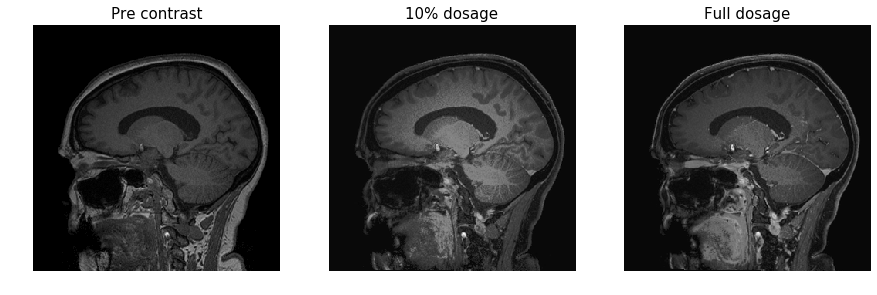

In [16]:
iminfo(ims[96, 0])
iminfo(ims[96, 1])
iminfo(ims[96, 2])

show_gad_comparison(ims[96, 0], ims[96, 1], ims[96, 2])

## Hoag

### Before hist-eq

| Min | Max | Mean |
| ----|-----|------|
| 0.0 | 1590.0 | 203.27867 |
| 0.0 | 1718.0 | 163.46953 |
| 0.0 | 1831.0 | 209.00232 |

### After hist-eq
| Min | Max | Mean |
| ----|-----|------|
| 0.0 | 1590.0 | 198.17671 |
| 0.0 | 1718.0 | 158.98676 |
| 0.0 | 1831.0 | 204.06445 |


## Tiantan

### Before hist-eq

| Min | Max | Mean |
| ----|-----|------|
| 0.0 | 570.0 | 110.65271 |
| 0.0 | 769.0 | 134.63882 |
| 0.0 | 1362.0 | 175.23274 |

### After hist-eq

| Min | Max | Mean |
| ----|-----|------|
| 0.0 | 570.0 | 109.19512 |
| 0.0 | 652.9431 | 118.8643 |
| 0.0 | 659.8182 | 120.746 |